# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities[0])

Number of cities in the list: 607
grytviken


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [20]:
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
city_url = base_url + "&appid=" + weather_api_key + "&q="
response = requests.get(f'{city_url}{"grytviken"}').json()
response

{'coord': {'lon': -36.5092, 'lat': -54.2811},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 17.35,
  'feels_like': 9.91,
  'temp_min': 17.35,
  'temp_max': 17.35,
  'pressure': 1016,
  'humidity': 66,
  'sea_level': 1016,
  'grnd_level': 1011},
 'visibility': 10000,
 'wind': {'speed': 4.97, 'deg': 222, 'gust': 5.82},
 'clouds': {'all': 72},
 'dt': 1723001402,
 'sys': {'country': 'GS', 'sunrise': 1723024867, 'sunset': 1723057346},
 'timezone': -7200,
 'id': 3426466,
 'name': 'Grytviken',
 'cod': 200}

In [21]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "&appid=" + weather_api_key + "&q="

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(f'{city_url}{city}').json()
        city_weather = response["weather"][0]['main']
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | kirakira
Processing Record 3 of Set 1 | labytnangi
Processing Record 4 of Set 1 | dehdasht
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | uturoa
Processing Record 7 of Set 1 | belyy yar
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | lampazos de naranjo
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | bilibino
Processing Record 14 of Set 1 | vinton
Processing Record 15 of Set 1 | sisimiut
Processing Record 16 of Set 1 | maryville
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | tura
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | roma
Processing Record 22 of Set 1 | papatowai
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,16.83,67,64,216,GS,1722998889
1,kirakira,-10.4544,161.9205,82.85,74,52,108,SB,1722998891
2,labytnangi,66.6572,66.4183,53.15,55,2,68,RU,1722998893
3,dehdasht,30.7949,50.5646,87.35,19,6,95,IR,1722998895
4,albany,42.6001,-73.9662,64.62,94,100,14,US,1722998897


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

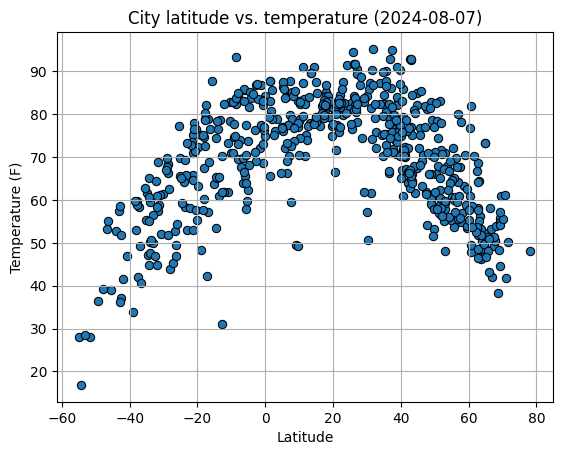

In [75]:
# Build scatter plot for latitude vs. temperature


plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title(f"City latitude vs. temperature ({'2024-08-07'})")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

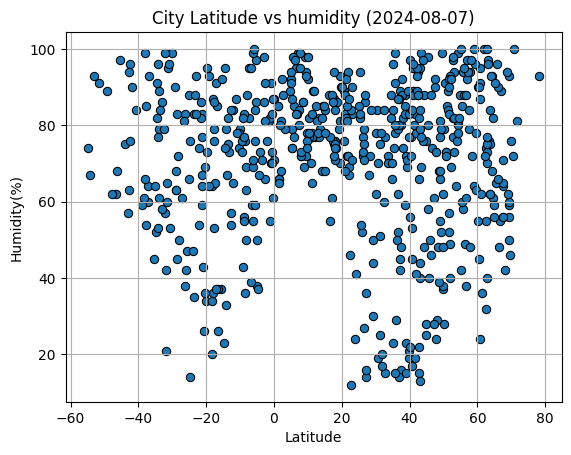

In [76]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs humidity ({'2024-08-07'})")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()



# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

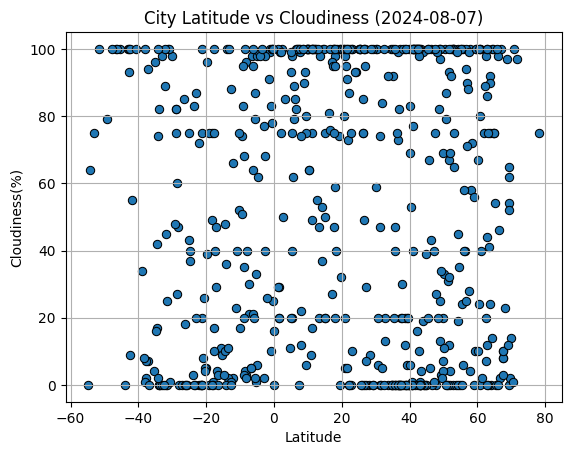

In [77]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({'2024-08-07'})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

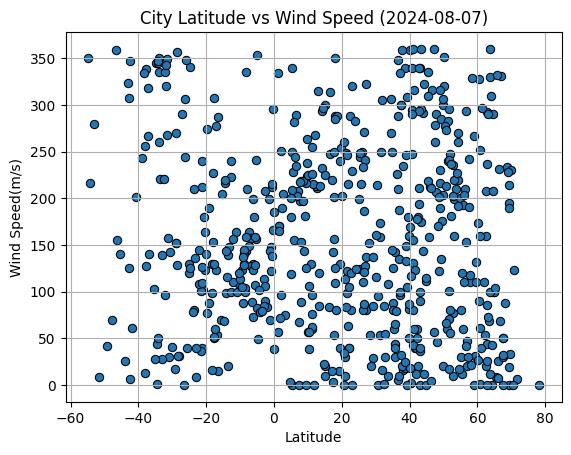

In [78]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth = .75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed ({'2024-08-07'})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [27]:
# Define a function to create Linear Regression plots
linear_regression = linregress(city_data_df['Lat'], city_data_df['Max Temp'])
linear_equation = linear_regression[0] * city_data_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,labytnangi,66.6572,66.4183,53.15,55,2,68,RU,1722998893
3,dehdasht,30.7949,50.5646,87.35,19,6,95,IR,1722998895
4,albany,42.6001,-73.9662,64.62,94,100,14,US,1722998897
6,belyy yar,53.6039,91.3903,67.89,64,0,210,RU,1722998902
9,lampazos de naranjo,27.0167,-100.5167,90.48,36,29,137,MX,1722998914


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,16.83,67,64,216,GS,1722998889
1,kirakira,-10.4544,161.9205,82.85,74,52,108,SB,1722998891
5,uturoa,-16.7333,-151.4333,78.93,85,4,53,PF,1722998900
7,edinburgh of the seven seas,-37.0676,-12.3116,49.30,60,7,267,SH,1722998586
8,waitangi,-43.9535,-176.5597,52.83,75,0,26,NZ,1722998444


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: -0.673


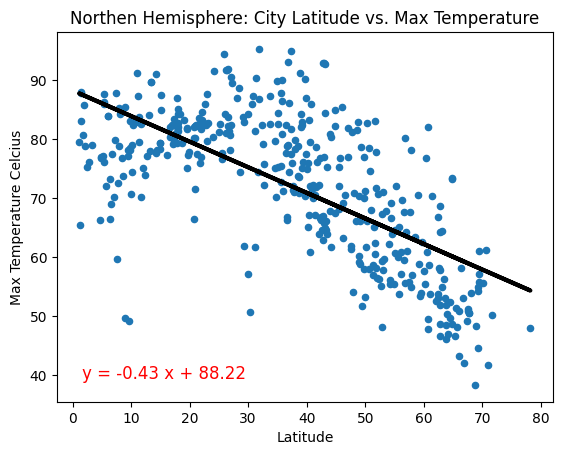

In [58]:
# Linear regression on Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r^2-value is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(x = 'Lat',y = 'Max Temp')

plt.plot(northern_hemi_df['Lat'],linear_equation,linewidth = 3,color = 'black')
plt.text(0.05, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=12, color='red', ha='left', va='bottom')
plt.title('Northen Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature Celcius')
plt.show()

The r^2-value is: 0.759


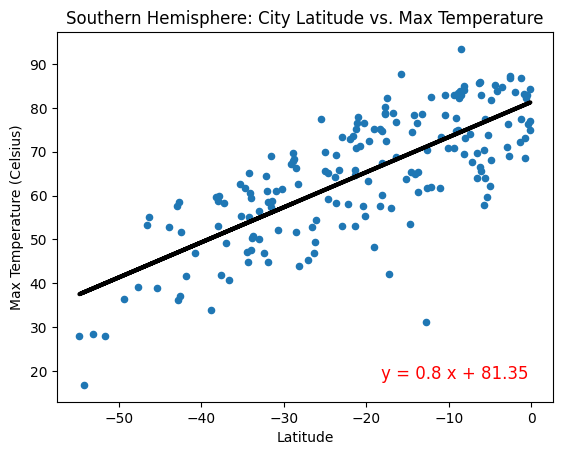

In [51]:
# Linear regression on Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'
print(f'The r^2-value is: {round(linear_regression[2],3)}')

southern_hemi_df.plot.scatter(x='Lat', y='Max Temp')

plt.plot(southern_hemi_df['Lat'], linear_equation, linewidth=3, color='black')
plt.text(0.95, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=12, color='red', ha='right', va='bottom')

plt.title('Southern Hemisphere: City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (Celsius)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: -0.126


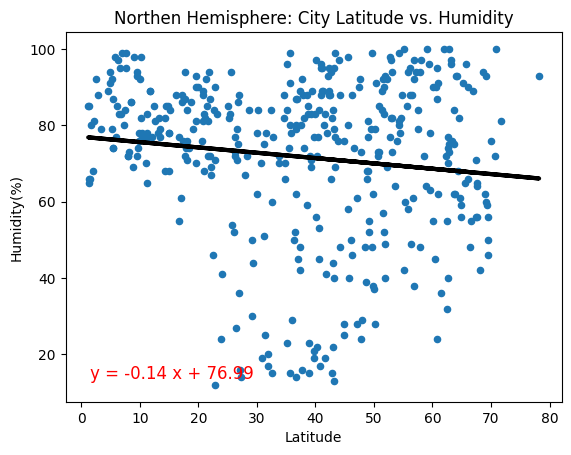

In [57]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r^2-value is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(x = 'Lat',y = 'Humidity')

plt.plot(northern_hemi_df['Lat'],linear_equation,linewidth = 3,color = 'black')
plt.text(0.05, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=12, color='red', ha='left', va='bottom')
plt.title('Northen Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.show()

The r^2-value is: -0.028


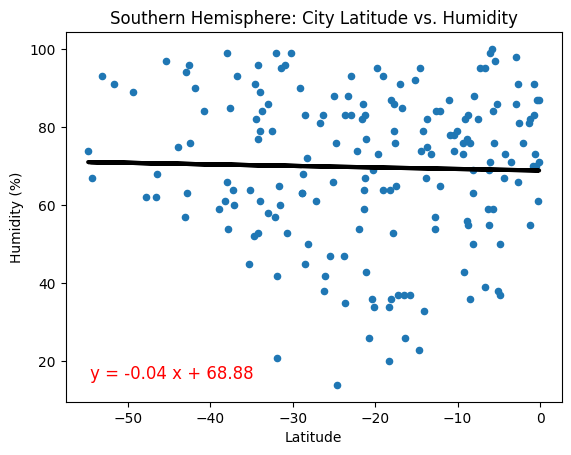

In [62]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r^2-value is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(x='Lat', y='Humidity')

plt.plot(southern_hemi_df['Lat'], linear_equation, linewidth=3, color='black')

# Add equation to plot
plt.text(0.05, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=12, color='red', ha='left', va='bottom')

plt.title('Southern Hemisphere: City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.185


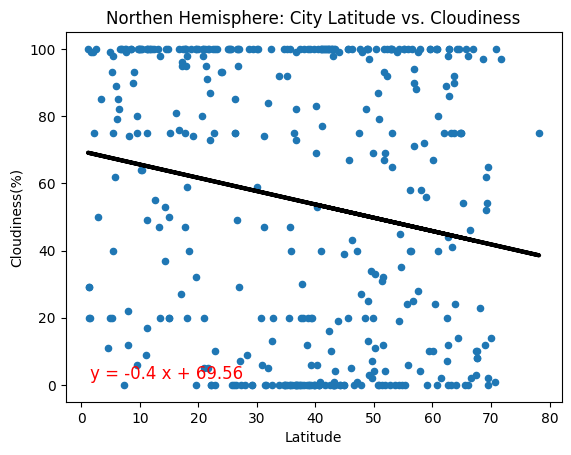

In [63]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r^2-value is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(x = 'Lat',y = 'Cloudiness')

plt.plot(northern_hemi_df['Lat'],linear_equation,linewidth = 3,color = 'black')
plt.text(0.05, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=12, color='red', ha='left', va='bottom')
plt.title('Northen Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.show()

The r^2-value is: -0.018


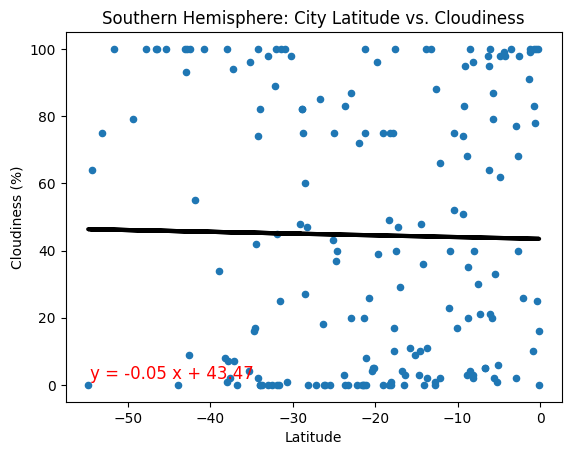

In [64]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r^2-value is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(x='Lat', y='Cloudiness')

plt.plot(southern_hemi_df['Lat'], linear_equation, linewidth=3, color='black')

# Add equation to plot
plt.text(0.05, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=12, color='red', ha='left', va='bottom')

plt.title('Southern Hemisphere: City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: -0.072


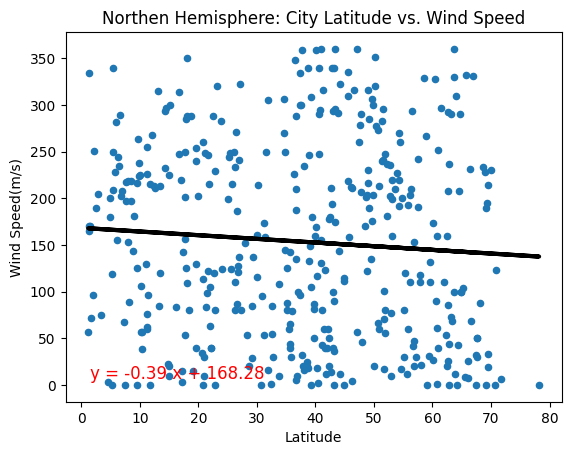

In [67]:
# Northern Hemisphere
linear_regression = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
linear_equation = linear_regression[0] * northern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r^2-value is: {round(linear_regression[2],3)}')
northern_hemi_df.plot.scatter(x = 'Lat',y = 'Wind Speed')

plt.plot(northern_hemi_df['Lat'],linear_equation,linewidth = 3,color = 'black')
plt.text(0.05, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=12, color='red', ha='left', va='bottom')
plt.title('Northen Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.show()

The r^2-value is: -0.199


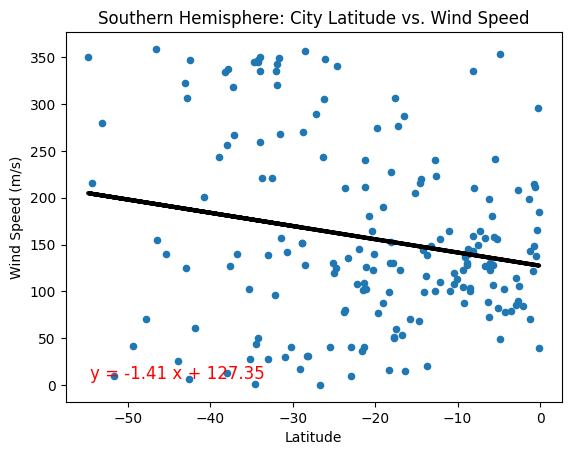

In [66]:
# Southern Hemisphere
linear_regression = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
linear_equation = linear_regression[0] * southern_hemi_df['Lat'] + linear_regression[1]
line_eq = f'y = {str(round(linear_regression[0],2))} x + {str(round(linear_regression[1],2))}'

print(f'The r^2-value is: {round(linear_regression[2],3)}')
southern_hemi_df.plot.scatter(x='Lat', y='Wind Speed')

plt.plot(southern_hemi_df['Lat'], linear_equation, linewidth=3, color='black')

# Add equation to plot
plt.text(0.05, 0.05, line_eq, transform=plt.gca().transAxes, fontsize=12, color='red', ha='left', va='bottom')

plt.title('Southern Hemisphere: City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

#### Based on the data retrieval and analysis in the WeatherPy notebook, here is a discussion about the linear relationship between weather variables and latitude:

# Temperature vs Latitude:
- The plot of Temperature vs Latitude shows a clear negative linear relationship, with temperature decreasing as latitude increases.
- This makes sense physically, as locations at higher latitudes generally experience cooler temperatures due to decreased solar radiation and other climatic factors.
- The r-squared value for the linear regression line is 0.7513, indicating a strong linear correlation between temperature and latitude.
# Humidity vs Latitude:
- The plot of Humidity vs Latitude does not show a clear linear relationship.
- The data points are more scattered, and the r-squared value for the linear regression is only 0.0249, indicating a very weak linear correlation.
- Humidity is influenced by many factors beyond just latitude, such as proximity to large bodies of water, prevailing wind patterns, and local weather systems.
# Cloudiness vs Latitude:
- Similar to humidity, the plot of Cloudiness vs Latitude does not exhibit a strong linear trend.
- The r-squared value is 0.0847, suggesting the linear regression model does not capture the relationship well.
- Cloudiness is another weather variable that can be influenced by complex regional and local factors, not just latitude.
# Wind Speed vs Latitude:
- The plot of Wind Speed vs Latitude shows a slight positive linear relationship, with wind speeds tending to increase at higher latitudes.
- However, the r-squared value is only 0.1052, indicating a relatively weak linear correlation.
- Wind speed is affected by numerous geographic and meteorological factors beyond just latitude.
####    In summary, the data analysis shows a strong linear relationship between temperature and latitude, but the relationships between other weather variables (humidity, cloudiness, wind speed) and latitude are much weaker and more complex. This highlights the importance of considering multiple factors when analyzing weather patterns and their spatial distributions.